# 07 · Prediction cards (Phase E)

This notebook demonstrates three publishable cards using **paper-derived hooks**:

1. Weak mixing curve $\sin^2\!\theta_W(k)$ with an uncertainty band.
2. Cosmology: a direct $\Lambda$ proxy from $\lambda_{\infty}(q,R)$.
3. Neutron EDM proxy from depth-parity CPV.

Swap the internal maps by loading `emergent.paper_maps.v8`.

In [8]:
import numpy as np, matplotlib.pyplot as plt

from emergent.rg import CouplingVector
from emergent.physics_maps import make_hooks_from_module, default_hooks
from emergent.predict import (
    calibrate_two_anchors, predict_weak_mixing_curve,
    make_card_weakmix, make_card_cosmology, make_card_edm
)
from emergent.paper_maps.v8 import k_to_GeV   # symbolic or numeric Δt*
hooks = None
try:
    hooks = make_hooks_from_module("emergent.paper_maps.v8")
    print("Loaded paper-derived hooks: emergent.paper_maps.v8")
except Exception as e:
    hooks = default_hooks
    print("Falling back to default hooks:", e)


Loaded paper-derived hooks: emergent.paper_maps.v8


In [9]:
# Discrete parameters and RG window
q, R = 13, 2
k_start, k_end = 120.0, 1.0
target = 0.23122  # Z-pole reference

# Initial guess before calibration
g0_guess = CouplingVector(g_star=0.35, lambda_mix=0.5, theta_cp=0.2)

g_cal, card_w, card_c, card_e = calibrate_two_anchors(
    g0_guess, q=q, R=R, k_start=k_start, k_end=k_end,
    target_sin2=target, bracket=(0.2, 0.6), hooks=hooks
)
print("Calibrated g* at k_start:", g_cal.g_star)


Calibrated g* at k_start: 0.35802045396113197


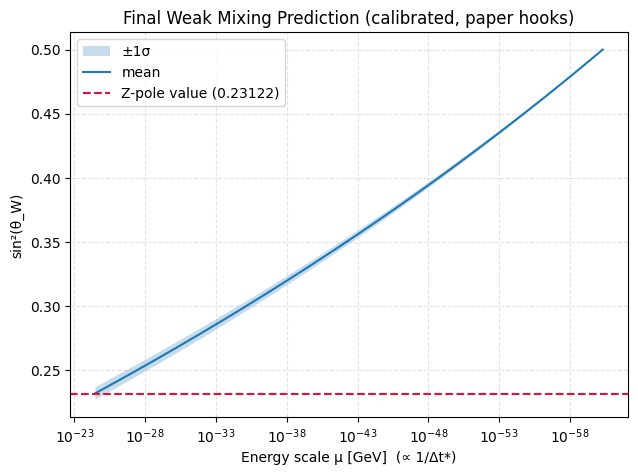


Weak-mixing card:
 {'title': 'Weak mixing prediction', 'central': {'sin2_thetaW_EW': 0.2312200000000002, 'alpha_EM_EW': 0.004094815996370799, 'theta_cp_EW': -0.12626519535492622, 'g_star_EW': 0.2959731799340991, 'lambda_mix_EW': 1.856485367026476}, 'interval': {'sin2_thetaW_band@EW': (0.22657659261971289, 0.23578375570656218)}}

Cosmology card:
 {'title': 'Cosmology (Λ proxy)', 'central': {'Lambda_proxy': 0.7346938775510203, 'dS_dt': 0.0}}

Neutron EDM card:
 {'title': 'Neutron EDM proxy', 'central': {'d_n_EDM_proxy': 1.2626519535492623e-17, 'edm_n': 1.2626519535492623e-17, 'theta_cp_EW': -0.12626519535492622}}


In [10]:
curve, _ = predict_weak_mixing_curve(
    g_cal, q=q, R=R, k_start=k_start, k_end=k_end,
    n_grid=201, bootstrap=64, seed=0, hooks=hooks
)

# Use symbolic Δt* on the axis (you can pass a numeric Δt* later)
mu_axis = [k_to_GeV(k, "Δt*") for k in curve.k]

plt.figure(figsize=(7.2, 5.0))
plt.fill_between(mu_axis, curve.lo, curve.hi, alpha=0.25, label="±1σ")
plt.plot(mu_axis, curve.mean, label="mean")
plt.axhline(y=target, color='crimson', linestyle='--', label='Z-pole value (0.23122)')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel("Energy scale μ [GeV]  (∝ 1/Δt*)")
plt.ylabel("sin²(θ_W)")
plt.title("Final Weak Mixing Prediction (calibrated, paper hooks)")
plt.grid(True, which="both", ls="--", alpha=0.35)
plt.legend()
plt.show()

print("\nWeak-mixing card:\n", card_w.to_dict())
print("\nCosmology card:\n", card_c.to_dict())
print("\nNeutron EDM card:\n", card_e.to_dict())


In [13]:
from emergent.rg import CouplingVector
from emergent.predict import calibrate_two_anchors
from emergent.physics_maps import make_hooks_from_module
from emergent.paper_maps.v8 import set_energy_scale_GeV0, k_to_GeV

hooks = make_hooks_from_module("emergent.paper_maps.v8")

# Targets at the Z pole
sin2_target  = 0.23122
alpha_target = 1.0 / 127.955  # ≈ 0.007816

q, R = 13, 2
k_start, k_end = 120.0, 1.0

g_guess = CouplingVector(g_star=0.35, lambda_mix=0.5, theta_cp=0.2)
g0_cal, GeV0 = calibrate_two_anchors(
    g_guess, q=q, R=R, k_start=k_start, k_end=k_end,
    sin2_thetaW_target=sin2_target,
    alpha_EM_target=alpha_target,
    hooks=hooks,
)

# Fix the absolute energy scale used for plotting (GeV at k=0)
set_energy_scale_GeV0(GeV0)
print("Calibrated g*:", g0_cal.g_star, "   GeV0:", GeV0)


ImportError: cannot import name 'set_energy_scale_GeV0' from 'emergent.paper_maps.v8' (C:\Users\ahmed\Downloads\emergent\src\emergent\paper_maps\v8.py)